# Cats vs Dogs

### Loading our images 
- Images are labeled catxxx.jpg and dogxxx.jpg

In [1]:
# Get filenames in list
from os import listdir
from os.path import isfile, join

mypath = "D:/development/DeepLearningCV/datasets/catsvsdogs/images/"

file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]

print(str(len(file_names)) + ' images loaded')

3002 images loaded


### Splitting our loaded images into a training and test/validation dataset
- We also need to store their labels (i.e. y_train and y_test)
- We re-size our images here to maintain a constant dimension of 150 x 150
- We're going to use 1000 images of dogs and 1000 images of cats as our training data
- For our test/validation dataset we're going to use 500 of each class
- Dogs will be labels 1 and cats 0
- We store our new images in the following directories
 - /datasets/catsvsdogs/train/dogs
 - /datasets/catsvsdogs/train/cats
 - /datasets/catsvsdogs/validation/dogs
 - /datasets/catsvsdogs/validation/cats

In [2]:
import cv2
import numpy as np
import sys
import os
import shutil

# Extract 1000 for our training data and 500 for our validation set
# Takes about ~20 seconds to run
dog_count = 0
cat_count = 0
training_size = 1000
test_size = 500
training_images = []
training_labels = []
test_images = []
test_labels = []
size = 150
dog_dir_train = "D:/development/DeepLearningCV/datasets/catsvsdogs/train/dogs/"
cat_dir_train = "D:/development/DeepLearningCV/datasets/catsvsdogs/train/cats/"
dog_dir_val = "D:/development/DeepLearningCV/datasets/catsvsdogs/validation/dogs/"
cat_dir_val = "D:/development/DeepLearningCV/datasets/catsvsdogs/validation/cats/"

def make_dir(directory):
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory)

make_dir(dog_dir_train)
make_dir(cat_dir_train)
make_dir(dog_dir_val)
make_dir(cat_dir_val)

def getZeros(number):
    if(number > 10 and number < 100):
        return "0"
    if(number < 10):
        return "00"
    else:
        return ""

for i, file in enumerate(file_names):
    
    if file_names[i][0] == "d":
        dog_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if dog_count <= training_size:
            training_images.append(image)
            training_labels.append(1)
            zeros = getZeros(dog_count)
            cv2.imwrite(dog_dir_train + "dog" + str(zeros) + str(dog_count) + ".jpg", image)
        if dog_count > training_size and dog_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(1)
            zeros = getZeros(dog_count-1000)
            cv2.imwrite(dog_dir_val + "dog" + str(zeros) + str(dog_count-1000) + ".jpg", image)
            
    if file_names[i][0] == "c":
        cat_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if cat_count <= training_size:
            training_images.append(image)
            training_labels.append(0)
            zeros = getZeros(cat_count)
            cv2.imwrite(cat_dir_train + "cat" + str(zeros) + str(cat_count) + ".jpg", image)
        if cat_count > training_size and cat_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(0)
            zeros = getZeros(cat_count-1000)
            cv2.imwrite(cat_dir_val + "cat" + str(zeros) + str(cat_count-1000) + ".jpg", image)

    if dog_count == training_size+test_size and cat_count == training_size+test_size:
        break

print("Training and Test Data Extraction Complete")

Training and Test Data Extraction Complete


### Let's save our dataset's to NPZ files

In [3]:
# Using numpy's savez function to store our loaded data as NPZ files
np.savez('cats_vs_dogs_training_data.npz', np.array(training_images))
np.savez('cats_vs_dogs_training_labels.npz', np.array(training_labels))
np.savez('cats_vs_dogs_test_data.npz', np.array(test_images))
np.savez('cats_vs_dogs_test_labels.npz', np.array(test_labels))

In [4]:
# Loader Function
import numpy as np

def load_data_training_and_test(datasetname):
    
    npzfile = np.load(datasetname + "_training_data.npz")
    train = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']

    return (train, train_labels), (test, test_labels)

### Let's view some of our loaded images

In [5]:
for i in range(1,11):
    random = np.random.randint(0, len(training_images))
    cv2.imshow("image_"+str(i), training_images[random])
    if training_labels[random] == 0:
        print(str(i) + " - Cat")
    else:
        print(str(i)+ " - Dog")
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

1 - Cat
2 - Dog
3 - Cat
4 - Dog
5 - Cat
6 - Dog
7 - Cat
8 - Cat
9 - Dog
10 - Dog


### Let's get our data ready in the format expected by Keras
- We also stick the previous naming convention 

In [7]:
(x_train, y_train), (x_test, y_test) = load_data_training_and_test("cats_vs_dogs")

# Reshaping our label data from (2000,) to (2000,1) and test data from (1000,) to (1000,1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

# Change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[0].shape)


(2000, 150, 150, 3)
(2000, 1)
(1000, 150, 150, 3)
(1000, 1)
(150, 150, 3)
(150, 150, 3)


### Let's create our model using a simple CNN that similar to what we used for CIFAR10
- Except now we use a Sigmoid instead of Softmax
- **Sigmoids are used when we're doing binary (i.e. two class) classification
- Note the binary_crossentropy loss

In [8]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 16
epochs = 25

img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]
input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Using TensorFlow backend.
W0802 22:45:29.202800 10308 deprecation_wrapper.py:119] From D:\development\anaconda3\envs\dlcv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 22:45:29.227800 10308 deprecation_wrapper.py:119] From D:\development\anaconda3\envs\dlcv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 22:45:29.233800 10308 deprecation_wrapper.py:119] From D:\development\anaconda3\envs\dlcv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 22:45:29.289800 10308 deprecation_wrapper.py:119] From D:\development\anaconda3\envs\dlcv\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0802 22:45:2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

### Training our model

In [10]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)



Train on 2000 samples, validate on 1000 samples
Epoch 1/25
2000/2000 [==============================] - 44s 22ms/step - loss: 0.3411 - acc: 0.9240 - val_loss: 3.5068 - val_acc: 0.6690
Epoch 2/25
2000/2000 [==============================] - 43s 22ms/step - loss: 0.2599 - acc: 0.9360 - val_loss: 2.2686 - val_acc: 0.6760
Epoch 3/25
2000/2000 [==============================] - 43s 22ms/step - loss: 0.2383 - acc: 0.9405 - val_loss: 2.3104 - val_acc: 0.6680
Epoch 4/25
2000/2000 [==============================] - 42s 21ms/step - loss: 0.3216 - acc: 0.9165 - val_loss: 3.1051 - val_acc: 0.6810
Epoch 5/25
2000/2000 [==============================] - 42s 21ms/step - loss: 0.2287 - acc: 0.9445 - val_loss: 3.0114 - val_acc: 0.6770
Epoch 6/25
2000/2000 [==============================] - 43s 22ms/step - loss: 0.2490 - acc: 0.9465 - val_loss: 2.7542 - val_acc: 0.6520
Epoch 7/25
2000/2000 [==============================] - 41s 21ms/step - loss: 0.3036 - acc: 0.9390 - val_loss: 2.2298 - val_acc: 0.6310


OSError: Unable to create file (unable to open file: name = '/home/deeplearningcv/DeepLearningCV/Trained Models/cats_vs_dogs_V1.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

In [11]:
model.save("D:/development/DeepLearningCV/Trained Models/cats_vs_dogs_V1.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1000/1000 [==============================] - 5s 5ms/step
Test loss: 4.4859618511199955
Test accuracy: 0.628


### Testing our Classifier

In [15]:
import cv2
import numpy as np
from keras.models import load_model

classifier = load_model('D:/development/DeepLearningCV/Trained Models/cats_vs_dogs_V1.h5')

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    if pred == "[0]":
        pred = "cat"
    if pred == "[1]":
        pred = "dog"
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    #expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (input_im.shape[0]+2, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("Test Image", imageL)

    input_im = input_im.reshape(1,150,150,3) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

### Analysis
- Our results aren't bad, but they could be better

# Now let's train our Cats vs Dogs Classifier using Data Augmentation

In [16]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

input_shape = (150, 150, 3)
img_width = 150
img_height = 150

nb_train_samples = 2000
nb_validation_samples = 1000
batch_size = 16
epochs = 25

train_data_dir = 'D:/development/DeepLearningCV/datasets/catsvsdogs/train'
validation_data_dir = 'D:/development/DeepLearningCV/datasets/catsvsdogs/validation'

# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 30,           # randomly applies rotations
      width_shift_range = 0.3,       # randomly applies width shifting
      height_shift_range = 0.3,      # randomly applies height shifting
      horizontal_flip = True,        # randonly flips the image
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = False)    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Create our model, just like we did previously

In [17]:
# Creating out model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/25
125/125 [==============================] - 71s 567ms/step - loss: 0.7378 - acc: 0.5115 - val_loss: 0.6910 - val_acc: 0.5030
Epoch 2/25
125/125 [==============================] - 58s 462ms/step - loss: 0.6966 - acc: 0.5580 - val_loss: 0.6855 - val_acc: 0.5467
Epoch 3/25
125/125 [==============================] - 66s 530ms/step - loss: 0.6872 - acc: 0.5645 - val_loss: 0.6744 - val_acc: 0.6291
Epoch 4/25
125/125 [==============================] - 63s 503ms/step - loss: 0.6792 - acc: 0.5965 - val_loss: 0.6560 - val_acc: 0.5793
Epoch 5/25
125/125 [==============================] - 56s 447ms/step - loss: 0.6647 - acc: 0.6205 - val_loss: 0.6252 - val_acc: 0.6758
Epoch 6/25
125/125 [==============================] - 50s 396ms/step - loss: 0.6753 - acc: 0.5905 - val_loss: 0.6502 - val_acc: 0.6220
Epoch 7/25
125/125 [==============================] - 51s 407ms/step - loss: 0.6643 - acc: 0.5955 - val_loss: 0.6218 - val_acc: 0.6870
Epoch 8/25
125/125 [==============================] - 5

## Plotting our Loss and Accuracy Graphs

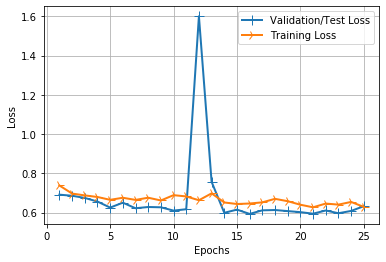

In [19]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

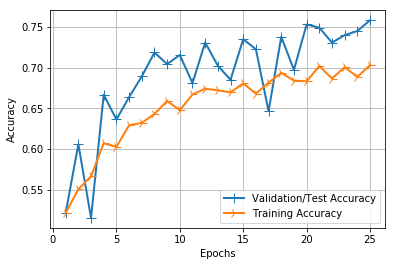

In [28]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()